In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from os import listdir
from os.path import isfile, join


from random import shuffle
# from collections import Counter
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential


In [74]:
# Go to the directory taht has the training database
# ***** It is needed to write the relative directory to catch teh database *****
pathDatabase = r"C:\\Users\\diogo\\OneDrive\\Área de Trabalho\\ENGENHARIA DE SISTEMAS\\10º PERÍODO\\LAB. IV\\UTKFace\\UTKFace"

os.chdir(pathDatabase)

In [75]:
# Define dir
onlyfiles = os.listdir()

In [76]:
# Show the total samples from original database
len(onlyfiles)

23708

In [77]:
shuffle(onlyfiles)

# Classes known - To the original database
categories = ['0','1','2', '3', '4']
race = []

# Captura as classes do arquivo
for i in onlyfiles:
    str_split = i.split('_')[2]
    if str_split in categories:
        race.append(str_split)

#Show the data lenght 
len(race)

23705

In [78]:
# Analyze data
race_pd = pd.DataFrame(race, columns = ['Coluna 1'])
race_pd['Coluna 1'].value_counts().index #Show the existing labels

Index(['0', '1', '3', '2', '4'], dtype='object')

In [79]:
# Here the adaptation happens to get close on what we have in Brazil
classes = []
for i in race:
    try:
        i = int(i)
        if i == 4: # Convert class 4 in 3
            i = 3
        classes.append(i)
    except:
        pass

In [80]:
# Define labels
labels =["Branco",  # index 0
        "Preto",      # index 1
        "Ásiatico",  # index 2
        "Pardo"      # index 3
        ]

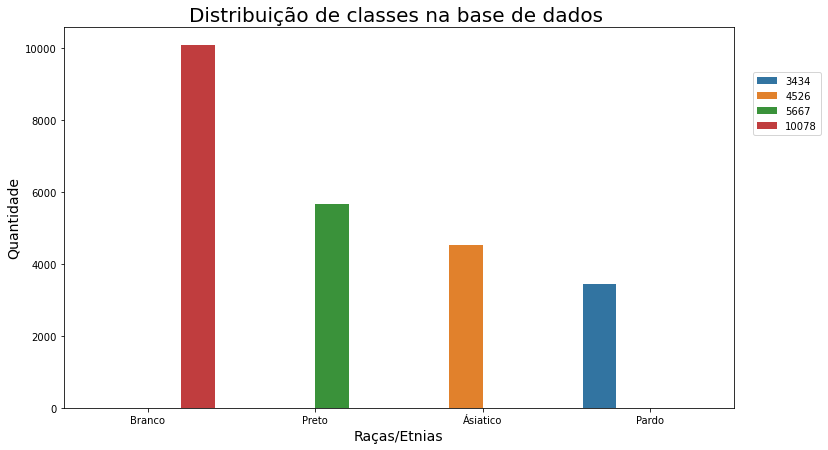

In [81]:
# After conversion, analyze data again
classes_pd = pd.DataFrame(classes, columns = ['Coluna 1'])
classes_pd['Coluna 1'].value_counts()

# Plot the difference between the classes
plt.figure(figsize=(12,7))
ax2 = sns.barplot(x = labels , y = classes_pd['Coluna 1'].value_counts()[:] , hue = classes_pd['Coluna 1'].value_counts() )
ax2.set_title('Distribuição de classes na base de dados ', fontsize = 20)
ax2.set_xlabel('Raças/Etnias', fontsize = 14)
ax2.set_ylabel('Quantidade', fontsize = 14)
plt.legend( bbox_to_anchor = (1.08, 0.8), loc = 'center' )
plt.show()

In [20]:
# Shwo thetotal samples
len(classes)

23705

In [82]:
# Import image lib manipulator 
import imageio

X_data =[]
size_image = 32

for file in onlyfiles:

    # Filtering data
    str_split = file.split('_')[2]
    if str_split in categories:
        face = imageio.imread(file)
        face = cv2.resize(face, (size_image, size_image) )
        X_data.append(face)

In [83]:
# Show the shape of the input 
len(X_data)

23705

In [71]:
file

'0.png'

In [23]:
# Transform in a single dimensional input
X = np.squeeze(X_data)

# Normalize data
X = X/255.0

In [24]:
# Make "Classes" a numpy array
classes = np.array(classes)

In [25]:
# Separate data to train and test
from sklearn.model_selection import train_test_split

tamanho = min(len(X), len(classes))
x_train, x_test, y_train, y_test = train_test_split(X[:tamanho], classes[:tamanho], test_size  = 0.33, random_state= 42)


In [26]:
# Start to use Keras 
import keras

model = keras.Sequential([
    keras.layers.Flatten( input_shape = (size_image, size_image, 3) ),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(5, activation = tf.nn.softmax)
])

In [27]:
# Model compile
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
# Model fit
model.fit(x_train,
         y_train,
         epochs=10
         )

Epoch 1/10
15882/15882 [==============================] - 8s 482us/step - loss: 1.0224 - accuracy: 0.5892
Epoch 2/10
15882/15882 [==============================] - 7s 438us/step - loss: 0.8401 - accuracy: 0.6638
Epoch 3/10
15882/15882 [==============================] - 7s 437us/step - loss: 0.7851 - accuracy: 0.6985
Epoch 4/10
15882/15882 [==============================] - 7s 432us/step - loss: 0.7717 - accuracy: 0.6972
Epoch 5/10
15882/15882 [==============================] - 7s 458us/step - loss: 0.7427 - accuracy: 0.7139
Epoch 6/10
15882/15882 [==============================] - 7s 441us/step - loss: 0.7160 - accuracy: 0.7233
Epoch 7/10
15882/15882 [==============================] - 7s 443us/step - loss: 0.7291 - accuracy: 0.7181
Epoch 8/10
15882/15882 [==============================] - 8s 512us/step - loss: 0.7028 - accuracy: 0.7293
Epoch 9/10
15882/15882 [==============================] - 7s 432us/step - loss: 0.7023 - accuracy: 0.7315
Epoch 10/10
15882/15882 [=====================

In [39]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test)

# Print test accuracy 
print('\n', 'Test accuracy:', score[1])

7823/7823 [==============================] - 1s 80us/step

 Test accuracy: 0.6552473306655884


In [40]:
# Predict the model
y_predict = model.predict(x_test)

# Show the first 'y' predicted
y_predict[0]

array([4.3482694e-01, 2.2536081e-03, 1.1722905e-02, 5.5119652e-01,
       8.9094704e-17], dtype=float32)

In [41]:
# Create PARDO class (Indian + Latino percents)
y_hat = y_predict[:, :4]
y_hat[:, 3] = y_predict[:, 3] + y_predict[:, 4] 

# Show the first new 'y' predicted
y_hat[0]

array([0.43482694, 0.00225361, 0.0117229 , 0.5511965 ], dtype=float32)

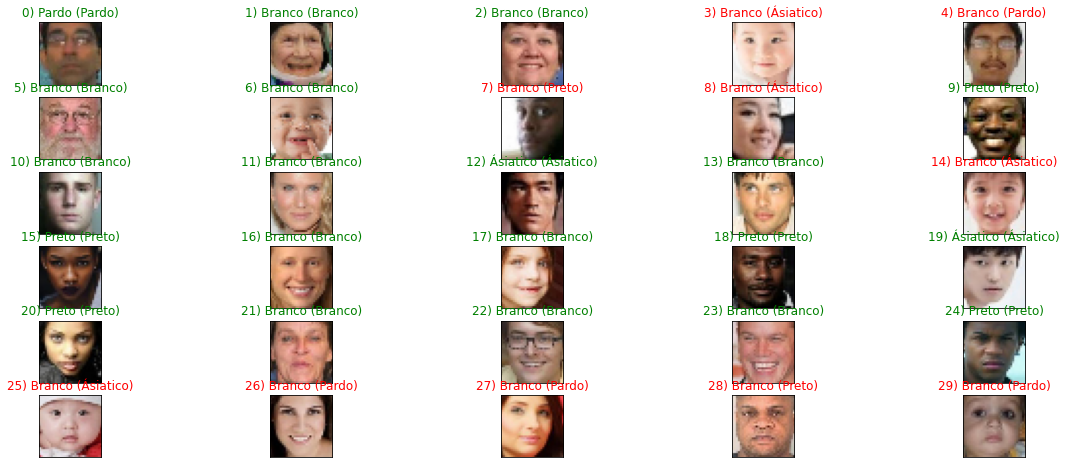

In [42]:
# Plot a random sample of 30 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
plt.tight_layout()

random_number = np.random.choice(x_test.shape[0], size=30, replace=False)
for i, index in enumerate( random_number ):
    ax = figure.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]

    
    # Set the title for each image
    ax.set_title("{}) {} ({})".format(i, labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

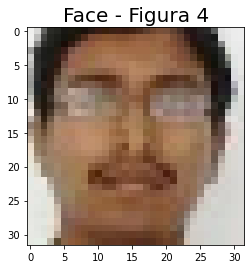

Classificação real -> 
Raça: Pardo. Label: 3


Classificação calculada, no formato:
[Branco Preto Ásiatico Pardo]
[0.6045968  0.0972757  0.00927239 0.288855  ]


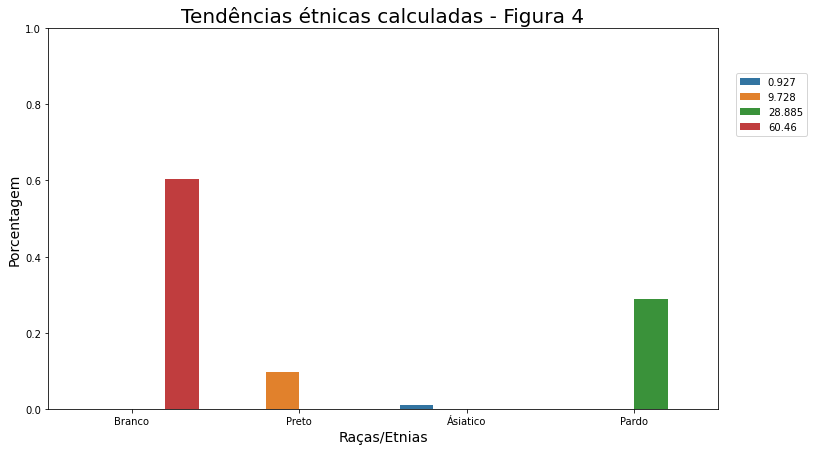

In [43]:
# Analyzing figure individually
number_figure = 4

# Plot face
plt.figure()
plt.title('Face - Figura {}'.format(number_figure), fontsize = 20)
plt.imshow(x_test[random_number[number_figure]])
plt.show()
print('Classificação real -> \nRaça: {}. Label: {}'.format(labels[y_test[random_number[number_figure]] ], y_test[random_number[number_figure]] ) )
print('\n')

print('Classificação calculada, no formato:')
print('[Branco Preto Ásiatico Pardo]')
print('{}'.format(y_hat[random_number[number_figure]]) )

# sns.set(style="dark")

# Plot percents from figure above
plt.figure(figsize=(12,7))
ax2 = sns.barplot(x = labels, y = y_hat[random_number[number_figure]], hue = (y_hat[random_number[number_figure]] * 100 ).round(3))
ax2.set_ylim((0, 1))
ax2.set_title('Tendências étnicas calculadas - Figura {}'.format(number_figure), fontsize = 20)
ax2.set_xlabel('Raças/Etnias', fontsize = 14)
ax2.set_ylabel('Porcentagem', fontsize = 14)
plt.legend( bbox_to_anchor = (1.08, 0.8), loc = 'center' )
plt.show()


In [93]:
# Use the folder created by createDatbase algorithm
# testing my own data
folderName = "Teste2"

pathFolder = r'C:\\Users\\diogo\\OneDrive\\Área de Trabalho\\ENGENHARIA DE SISTEMAS\\10º PERÍODO\\LAB. IV\\Projeto-LAB_IV\\' + folderName
os.chdir(pathFolder) # changing directory
onlyimage = os.listdir()


In [94]:
# Show number of samples (images)
len(onlyimage)

1000

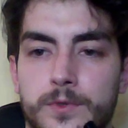

In [95]:
# Test if we can show an image
im = Image.open('20.jpg').resize((128,128))
im

In [96]:
# Import image lib manipulator 
import imageio

# Creating the input to the model
myDATA =[]
for file in onlyimage:
    face = imageio.imread(file)
    face = cv2.resize(face, (size_image, size_image) )
    # face = Image.open(file).resize((size_image, size_image))
    myDATA.append(face)


print(len(myDATA))

myDATA = np.squeeze(myDATA)

# Normalize data
myDATA = myDATA/255.0

# Show the shape of data
myDATA.shape

1000


(1000, 32, 32, 3)

In [97]:
# Predicting my data
myFace_predict = model.predict(myDATA)

print(myFace_predict[0])

# Create PARDO class (Indian + Latino percents)
myFace_hat = myFace_predict[:, :4]
myFace_hat[:, 3] = myFace_predict[:, 3] + myFace_predict[:, 4] 

# Show the first new 'myFace' predicted
myFace_hat[0]


[7.2618985e-01 5.9164281e-04 1.8905868e-01 8.4159873e-02 3.3127147e-11]


array([7.2618985e-01, 5.9164281e-04, 1.8905868e-01, 8.4159873e-02],
      dtype=float32)

In [98]:
# Join data - mean from individually calculus 
dados = [ myFace_hat[:,0].mean(), myFace_hat[:,1].mean(), myFace_hat[:,2].mean(), myFace_hat[:,3].mean()]


# Making a dataframe from data
dados = pd.DataFrame(dados, columns = ['Percentual'] ,index= labels)

#Show data
print(dados['Percentual'])
print('\n')

# Show the sum of percentuals, it must be equal to 1
print('Soma = {}'.format(sum(dados['Percentual']) ))

Branco      0.745108
Preto       0.002380
Ásiatico    0.153829
Pardo       0.098683
Name: Percentual, dtype: float64


Soma = 1.0000000474974513


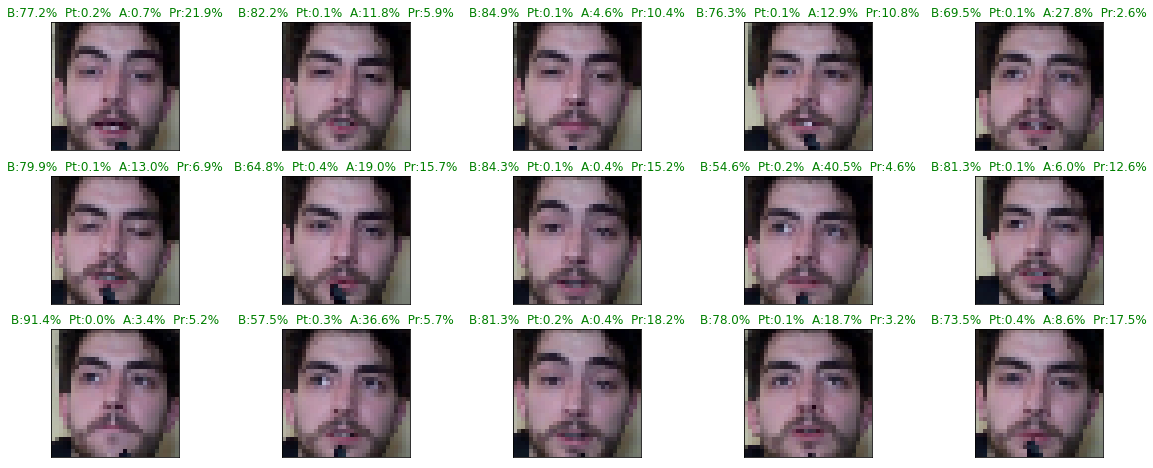

In [99]:
# What i classify me
myLabel = 0 # Branco

# Plot a random sample of 30 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
plt.tight_layout()

random_number = np.random.choice(myDATA.shape[0], size=15, replace=False)
for i, index in enumerate( random_number ):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(myDATA[index]))
    predict_index = np.argmax(myFace_hat[index])

    
    # Set the title for each image
    ax.set_title("B:{}%  Pt:{}%  A:{}%  Pr:{}%".format( (myFace_hat[index][0] * 100).round(1), (myFace_hat[index][1] * 100).round(1), 
                                  (myFace_hat[index][2] * 100).round(1), (myFace_hat[index][3] * 100).round(1)),
                                  color=("green" if predict_index == myLabel else "red"))
plt.show()

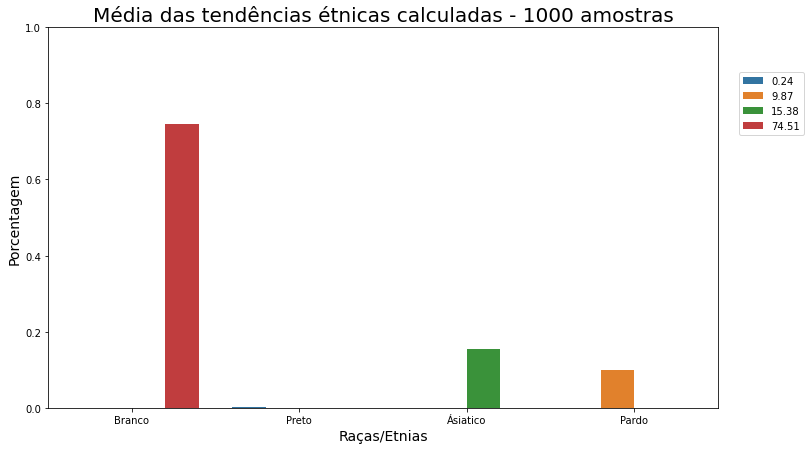

In [100]:
# Plot percents of means from folder created
plt.figure(figsize=(12,7))
ax2 = sns.barplot(x = labels, y = dados['Percentual'], hue = (dados['Percentual'] * 100).round(2) )
ax2.set_ylim((0, 1))
ax2.set_title('Média das tendências étnicas calculadas - {} amostras'.format(len(myDATA)), fontsize = 20)
ax2.set_xlabel('Raças/Etnias', fontsize = 14)
ax2.set_ylabel('Porcentagem', fontsize = 14)
plt.legend( bbox_to_anchor = (1.08, 0.8), loc = 'center' )
plt.show()
